<h2>Import packages and data</h2>

In [1]:
from scipy.io import netcdf
import similarity_measures as sim
import calculations as calc
import comparing as comp
import combining as comb
import plots
import numpy as np

In [2]:
nc_l30 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l30-u.nc")

<h2>Derive QBO</h2>

In [3]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 180)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0)

lon_step = 256 #Around the whole equator
lat_step = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0) - calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 5)


u_l30 = nc_l30.variables["u"]

#Deseasonalize
u_l30 = calc.deseasonalize_map(u_l30)

qbo_equator = calc.derive(u_l30[:, :, :, :], lat, lon, 0, lat_step, lon_step)

<h1>Level of agreement</h1>

In [4]:
print(plots.plot_level_of_agreement.__doc__)


    Plot a map with the agreement of several similarity measures.
    For each similarity measure the scoring function will determine if there is a value that
    can be considered a dependency or not.

    The plotted map contains the percentages of how many of the similarity measures voted there is
    a dependency.

    Typical scoring function would be scoring_func = lambda x : x >= 0.8 and typical scaling function would
    be scaling_func=comp.binning_values_to_quantiles.
    Using this functions, the output map will show for how many similarity measures the similarity
    value between the time series of the point and the reference series is in the upper 20%.

    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, latitude, longitude
        reference_series (numpy.ndarray): 1 dimensional reference series
        scoring_func (function): Function that takes in a value and outputs a boolean (whether there
                                 is a dependenc

In [5]:
scoring_func = lambda x : x >= 0.8

<h2>Level of agreement between 3 similarity measures</h2>

In [10]:
measures = [(lambda x, y: abs(sim.pearson_correlation(x, y))), sim.mutual_information, comp.invert(sim.transfer_entropy)]

In [11]:
measure_labels = ["Pearson's Correlation", "Mutual Information", "Transfer Entropy"]

C:\Users\tousp\OneDrive\KIT\6. Semester\Bachelorarbeit\Climate-Similarity-Metrics\plots.py:474: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=ax)


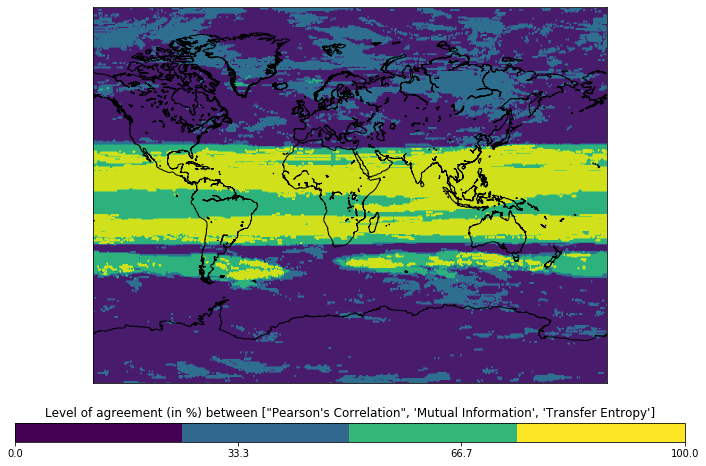

In [12]:
plots.plot_level_of_agreement(u_l30, qbo_equator, scoring_func, measures, measure_labels)

<h3>Use a more strict criterion</h3>

In [13]:
scoring_func = lambda x : x >= 0.9

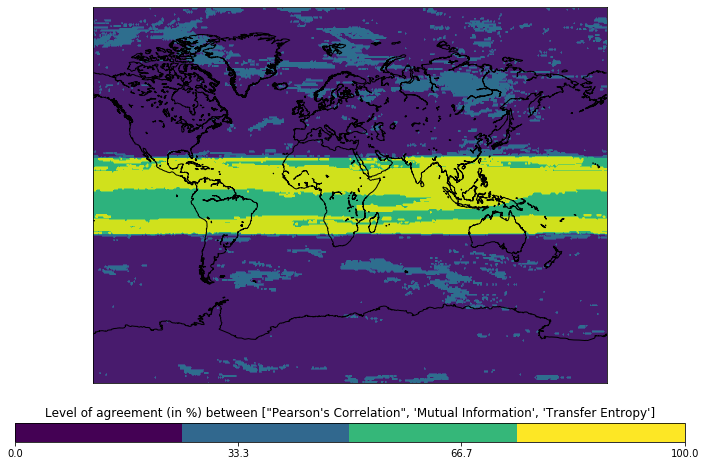

In [14]:
plots.plot_level_of_agreement(u_l30, qbo_equator, scoring_func, measures, measure_labels)

<h2>Level of agreement between 6 similarity measures</h2>

In [15]:
measures = [sim.pearson_correlation, sim.mutual_information, comp.invert(sim.transfer_entropy), comp.invert(sim.manhattan_distance), sim.kendall_tau, sim.euclidean_distance]

In [16]:
measure_labels = ["Pearson's Correlation", "Mutual Information", "Transfer Entropy", "Manhattan Distance", "Kendall's Tau", "Euclidean Distance"]

In [17]:
scoring_func = lambda x : x >= 0.8

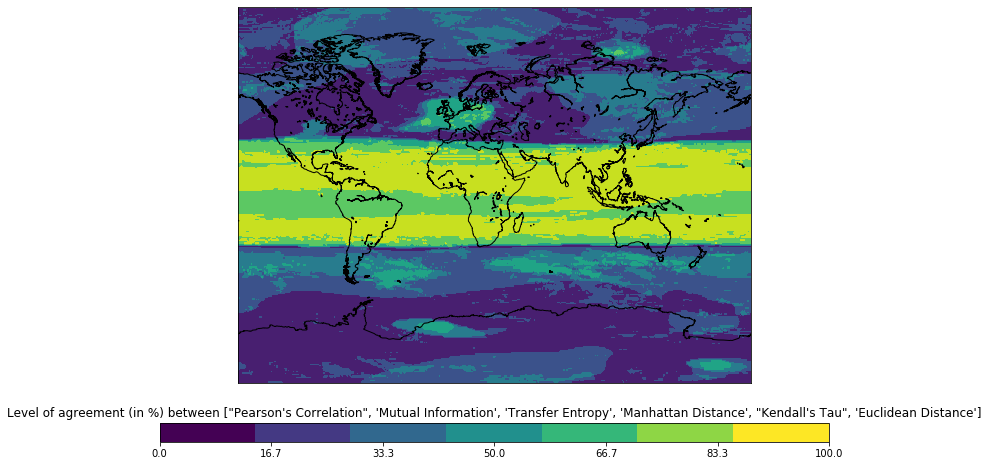

In [18]:
plots.plot_level_of_agreement(u_l30, qbo_equator, scoring_func, measures, measure_labels)

<h2>Where do they agree there is no dependency?</h2>

In [19]:
scoring_func = lambda x : x <= 0.2

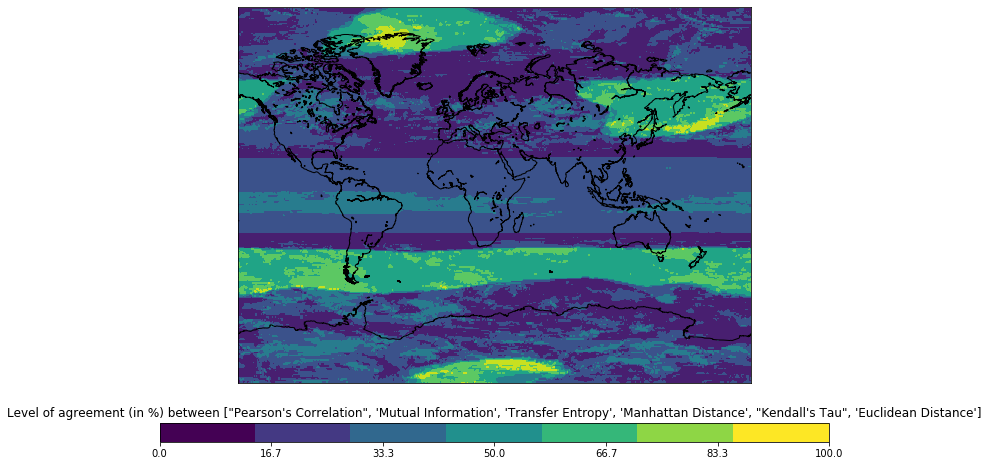

In [20]:
plots.plot_level_of_agreement(u_l30, qbo_equator, scoring_func, measures, measure_labels)